In [1]:
path = 'C:/Users/joaqu/Box/Emotional-State-Capstone/data/R00/fitbit/fitbit_detailed/'
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import re
import os
import pickle
import datetime
import pendulum

In [1161]:
files = os.listdir(path = path)
print(files[0:])

['HR_DF_TIMECORRECTED.pickle', 'R00_1002_Activity_Tracking.xlsx', 'R00_1004_Activity_Tracking.xlsx', 'R00_1008_Activity_Tracking.xlsx', 'R00_1009_Activity_Tracking.xlsx', 'R00_1014_Activity_Tracking.xlsx', 'R00_1016_Activity_Tracking.xlsx', 'R00_1018_Activity_Tracking.xlsx', 'R00_1019_Activity_Tracking.xlsx', 'R00_1020_Activity_Tracking.xlsx', 'R00_1021_Activity_Tracking.xlsx', 'R00_1024_Activity_Tracking.xlsx', 'R00_1029_Activity_Tracking.xlsx', 'R00_1030_Activity_Tracking.xlsx', 'R00_1032_Activity_Tracking.xlsx', 'R00_1034_Activity_Tracking.xlsx', 'R00_1035_Activity_Tracking.xlsx', 'R00_1037_Activity_Tracking.xlsx', 'R00_1039_Activity_Tracking.xlsx', 'R00_1041_Activity_Tracking.xlsx', 'R00_1045_Activity_Tracking.xlsx', 'R00_1047_Activity_Tracking.xlsx', 'R00_1048_Activity_Tracking.xlsx', 'R00_1049_Activity_Tracking.xlsx', 'R00_1050_Activity_Tracking.xlsx', 'R00_1051_Activity_Tracking.xlsx', 'R00_1060_Activity_Tracking.xlsx', 'R00_1066_Activity_Tracking.xlsx', 'R00_1067_Activity_Track

In [1162]:
files = files[1:-1].copy()

In [ ]:
def parser(file, variable, print_file = True, time = 'min'):
    '''
    This function parse a single file from the fitbit_detailed folder and return a long dataset of the  desired variable
    :param file: str (a complete path to the file)
    :param variable: str ['HR', 'steps', 'sleep']
    :print_file: bol (if you want to print or not)
    :time: str ['min', 'sec']
    :return: pandas.DataFrame
    '''
    
    ID = file.split('_')[-3]
    print(ID)
    file = pd.read_excel(file, sheet_name= None)
    sheet_name = [i for i in file.keys()]
    var_df = re.findall(r'API_[0-9]+_' + variable + '_[0-9]+_' + time, str(sheet_name))
    if print_file: print(var_df)
    

    df = pd.DataFrame(file[var_df[0]]) #use the first sheet to set the DF
    df['ID'] = ID
    df['DATE'] = var_df[0].split('_')[3]
    df.columns = [name.upper() for name in df.columns]
    #########################################################################
    # HARDCODED | The files have inconsistent name
    for name in df.columns:
        if name in ['DATE TIME','DATE/TIME', 'DATETIME', 'TIME', 'IME']:
            df = df.rename(columns={ name : "TIME"})
    ########################################################################
    
    for sheet in var_df[1:]:
       # print(sheet)
        df2 = pd.DataFrame(file[sheet])
       # print(df2)
        df2['ID'] = ID
        df2['DATE'] = sheet.split('_')[3]
        df2.columns = [name.upper() for name in df2.columns]         
    #########################################################################
    # HARDCODED | The files have inconsistent name
        for name in df2.columns:
            if name in ['DATE TIME','DATE/TIME', 'DATETIME', 'TIME', 'IME']:
                df2 = df2.rename(columns={ name : "TIME"})
    ########################################################################
    
        df = pd.concat([df,df2], axis=0, join='outer', sort = False).copy().reset_index(drop=True)
        
    return df
    

---

# Heart-rate (HR)

In [1158]:
#One more time I inititiate the first file
df = parser(path + files[0], 'HR', print_file=True, time='sec')  

1002
['API_1002_HR_0716_sec', 'API_1002_HR_0717_sec', 'API_1002_HR_0718_sec', 'API_1002_HR_0719_sec', 'API_1002_HR_0720_sec', 'API_1002_HR_0721_sec', 'API_1002_HR_0722_sec', 'API_1002_HR_0723_sec', 'API_1002_HR_0724_sec', 'API_1002_HR_0725_sec']


In [1166]:
df.query('ID == "1002" and DATE == "0717"')

,TIME,VALUE,ID,DATE,N/A
8976,00:00:00,88.0,1002,0717,NaN
8977,00:00:05,89.0,1002,0717,NaN
8978,00:00:10,91.0,1002,0717,NaN
8979,00:00:15,92.0,1002,0717,NaN
8980,00:00:25,93.0,1002,0717,NaN
...,...,...,...,...,...
17304,23:58:25,96.0,1002,0717,NaN
17305,23:58:30,98.0,1002,0717,NaN
17306,23:58:35,95.0,1002,0717,NaN
17307,23:58:40,89.0,1002,0717,NaN


In [1160]:
for file in files[1:]:
    df2 = parser(path + file, 'HR', print_file=True, time='sec')
    df = pd.concat([df,df2], axis = 0, join = 'outer', sort = False).copy()

1004
['API_1004_HR_0630_sec', 'API_1004_HR_0701_sec', 'API_1004_HR_0702_sec', 'API_1004_HR_0703_sec', 'API_1004_HR_0704_sec', 'API_1004_HR_0705_sec', 'API_1004_HR_0706_sec', 'API_1002_HR_0707_sec', 'API_1004_HR_0708_sec', 'API_1004_HR_0709_sec']
1008
['API_1008_HR_0725_sec', 'API_1008_HR_0726_sec', 'API_1008_HR_0727_sec', 'API_1008_HR_0728_sec', 'API_1008_HR_0729_sec', 'API_1008_HR_0730_sec', 'API_1008_HR_0731_sec', 'API_1008_HR_0801_sec', 'API_1008_HR_0802_sec', 'API_1008_HR_0803_sec']
1009
['API_1009_HR_1002_sec', 'API_1009_HR_1003_sec', 'API_1009_HR_1004_sec', 'API_1009_HR_1005_sec', 'API_1009_HR_1006_sec', 'API_1009_HR_1007_sec', 'API_1009_HR_1008_sec', 'API_1009_HR_1009_sec', 'API_1009_HR_1010_sec', 'API_1009_HR_1011_sec']
1014
['API_1014_HR_0813_sec', 'API_1014_HR_0814_sec', 'API_1014_HR_0815_sec', 'API_1014_HR_0816_sec', 'API_1014_HR_0817_sec', 'API_1014_HR_0818_sec', 'API_1014_HR_0819_sec', 'API_1014_HR_0820_sec', 'API_1014_HR_0821_sec', 'API_1014_HR_0822_sec']
1016
['API_1016_

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'\x80\x03cpanda'

In [1165]:
df

,TIME,VALUE,ID,DATE,N/A
0,1904-01-01 00:00:00,73.0,1002,0716,NaN
1,1904-01-01 00:00:15,72.0,1002,0716,NaN
2,1904-01-01 00:00:20,70.0,1002,0716,NaN
3,1904-01-01 00:00:35,70.0,1002,0716,NaN
4,1904-01-01 00:00:40,65.0,1002,0716,NaN
...,...,...,...,...,...
73772,17:14:25,94.0,1097,1126,NaN
73773,17:14:40,94.0,1097,1126,NaN
73774,17:14:55,94.0,1097,1126,NaN
73775,18:36:40,70.0,1097,1126,NaN


In [1167]:
with open('./Pickle objects NOT CLEANED/HR_DF.pickle', 'wb') as handle:
    pickle.dump(df, handle)

In [1193]:
with open('./Pickle objects NOT CLEANED/HR_DF.pickle', 'rb') as handle:
    DF = pickle.load(handle)

DF = DF.drop(columns = 'N/A')
DF.reset_index(drop= True, inplace=True)
DF.head()
DF.query('ID == "1002" and DATE == "0717"')

,TIME,VALUE,ID,DATE
8976,00:00:00,88.0,1002,0717
8977,00:00:05,89.0,1002,0717
8978,00:00:10,91.0,1002,0717
8979,00:00:15,92.0,1002,0717
8980,00:00:25,93.0,1002,0717
...,...,...,...,...
17304,23:58:25,96.0,1002,0717
17305,23:58:30,98.0,1002,0717
17306,23:58:35,95.0,1002,0717
17307,23:58:40,89.0,1002,0717


## Let's analyze one subject

In [1194]:
DF.loc[DF['ID'] == '1004',:].head()

,TIME,VALUE,ID,DATE
88740,00:02:40,43.0,1004,0630
88741,00:02:50,43.0,1004,0630
88742,00:03:00,42.0,1004,0630
88743,00:03:10,43.0,1004,0630
88744,00:03:20,42.0,1004,0630


In [1195]:
DF.dtypes

TIME      object
VALUE    float64
ID        object
DATE      object
dtype: object

We have some problems with the datetime format so we would remove the microsenconds

In [1196]:
small_df = DF.loc[DF['ID'] == '1004',:].copy()
small_df.reset_index(inplace=True, drop = True)

In [1197]:
small_df.shape

(76404, 4)

In [1198]:
#small_df['DATE'] = small_df['DATE'].astype(int)

In [1199]:
small_df['TIME'] = [datetime.time(i.hour,i.minute, i.second) for i in small_df['TIME'].copy()]
small_df['VALUE'] = small_df['VALUE'].astype(int)
small_df.head()

,TIME,VALUE,ID,DATE
0,00:02:40,43,1004,0630
1,00:02:50,43,1004,0630
2,00:03:00,42,1004,0630
3,00:03:10,43,1004,0630
4,00:03:20,42,1004,0630


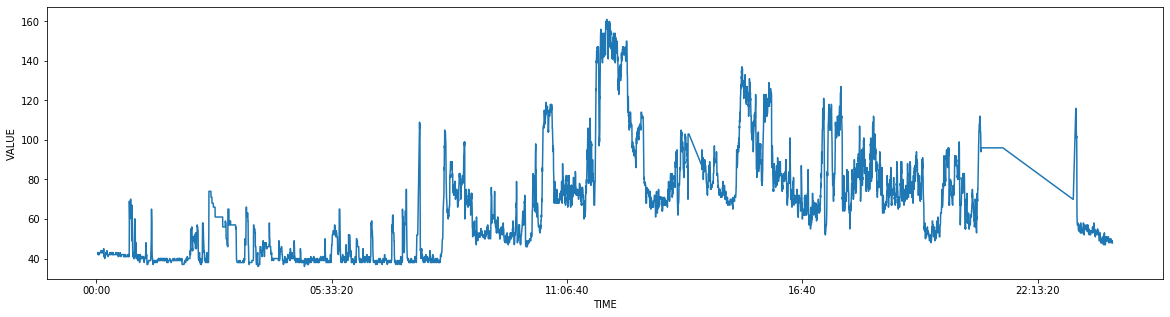

In [1200]:
#Plotting a single subject, single date to see the data
plt.figure(figsize=(20,5))
sbn.lineplot(x=small_df.loc[small_df['DATE'] == '0630',:]['TIME'] , y= small_df.loc[small_df['DATE'] == '0630',:]['VALUE'],estimator=None)

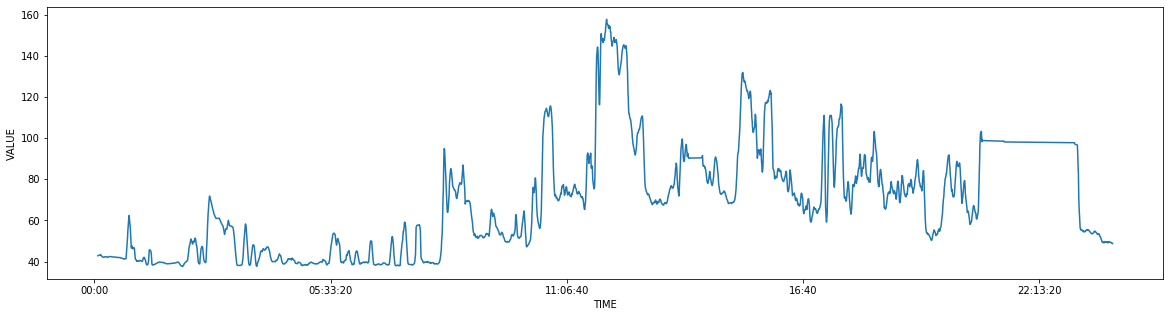

In [1201]:
#Moving average for one subject windows

rolled = small_df.loc[small_df['DATE'] == '0630',:]['VALUE'].rolling(25,center = True).mean()
plt.figure(figsize=(20,5))
sbn.lineplot(x = small_df.loc[small_df['DATE'] == '0630',:]['TIME'], y=rolled, estimator=None)


In [1202]:
#Let's make a descriptive analysis by day for one subject
dummy = DF.loc[DF['ID'] == '1004',:].groupby(by='DATE')

In [1203]:
pd.DataFrame(dummy.describe()).iloc[:,-8:]

VALUE                                                      
       count       mean        std   min   25%   50%    75%    max
DATE                                                              
0630  8333.0  70.650306  27.837789  36.0  47.0  69.0  84.00  161.0
0701  6946.0  58.367982  21.068347  36.0  44.0  53.0  67.00  157.0
0702  8312.0  60.794273  18.904144  37.0  45.0  58.0  70.00  161.0
0703  8741.0  62.449720  19.643409  35.0  51.0  58.0  68.00  126.0
0704  8023.0  61.395987  13.862644  41.0  52.0  58.0  66.00  120.0
0705  8385.0  60.624091  18.660106  40.0  50.0  55.0  63.00  184.0
0706  7726.0  61.680430  19.190997  34.0  42.0  62.0  73.00  150.0
0707  8386.0  65.449917  25.618674  36.0  43.0  62.0  74.00  155.0
0708  5248.0  59.022866   9.810082  39.0  52.0  58.0  65.00  126.0
0709  6304.0  67.022843  22.755098  36.0  55.0  64.0  72.25  162.0

In [1204]:
# A small example with only one subject. We can use tableau for this if we need something like an easy dashboard.
dates = DF.loc[DF['ID'] == '1004',:]['DATE'].unique()
dates

array(['0630', '0701', '0702', '0703', '0704', '0705', '0706', '0707',
       '0708', '0709'], dtype=object)

Text(0.5, 0.98, 'ID 1004 - Daily heart-rate values(HR)')

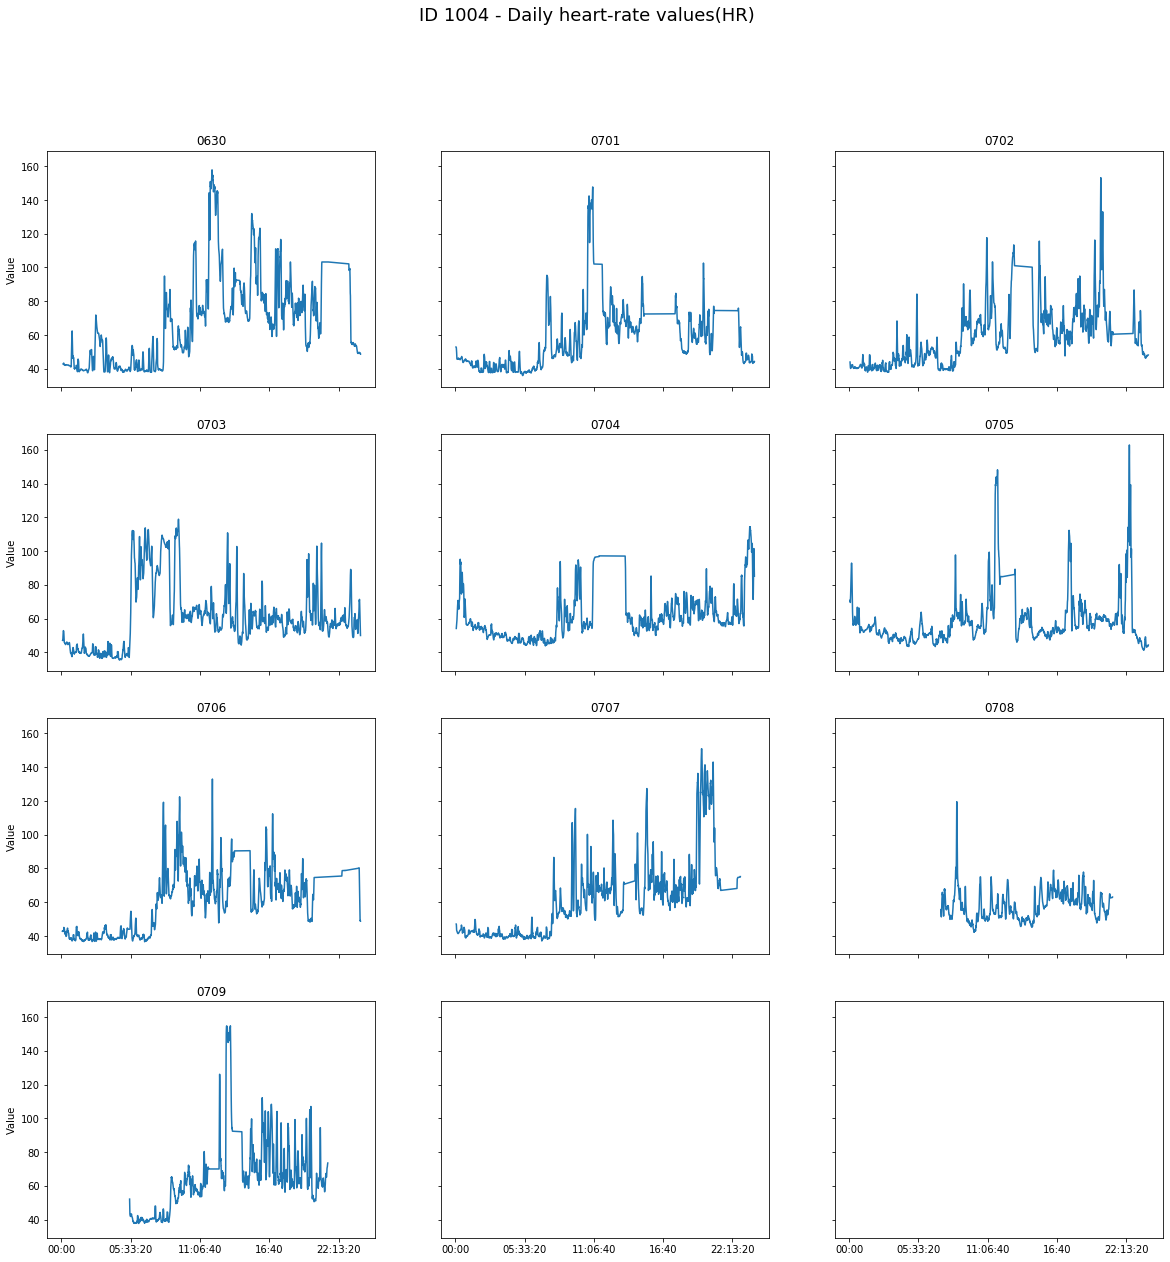

In [1205]:
fig, ax = plt.subplots(4, 3, sharex= True, sharey=True)
fig.set_size_inches(20,20)
ax = ax.reshape(1,-1)[0].copy()

for n, date in enumerate(dates):
    rolled = small_df.loc[small_df['DATE'] == date,:]['VALUE'].rolling(25).mean()
    graph = sbn.lineplot(x = small_df.loc[small_df['DATE'] == date,:]['TIME'],
                         y = rolled, estimator=None,
                         ax = ax[n])
    graph.set(xlabel='')

for n,x in enumerate(ax):
    if n > 9: break
    x.set_ylabel('Value')  
    x.set_title(dates[n])
plt.suptitle('ID 1004 - Daily heart-rate values(HR)', size = 18)

In [1206]:
def average_time(df):
    times = df['TIME'].unique().copy()
    all_data = []
    for t in times:
        all_data.append((t, df.loc[df['TIME'] == t , :]['VALUE'].mean(),
                         df.loc[df['TIME'] == t , :]['VALUE'].std() ,
                         df.loc[df['TIME'] == t , :].shape[0]))
    return all_data

In [1207]:
av_time = average_time(small_df)
av_time[:5]

[(datetime.time(0, 2, 40), 49.6, 12.074767078498866, 5),
 (datetime.time(0, 2, 50), 57.666666666666664, 14.502873278538061, 3),
 (datetime.time(0, 3), 46.166666666666664, 7.026141662866374, 6),
 (datetime.time(0, 3, 10), 52.166666666666664, 12.2542509631012, 6),
 (datetime.time(0, 3, 20), 50.666666666666664, 11.994443157840495, 6)]

In [1208]:
times = small_df['TIME'].unique()
print(len(times))
times

16831


array([datetime.time(0, 2, 40), datetime.time(0, 2, 50),
       datetime.time(0, 3), ..., datetime.time(21, 18, 45),
       datetime.time(21, 19, 25), datetime.time(21, 20, 25)], dtype=object)

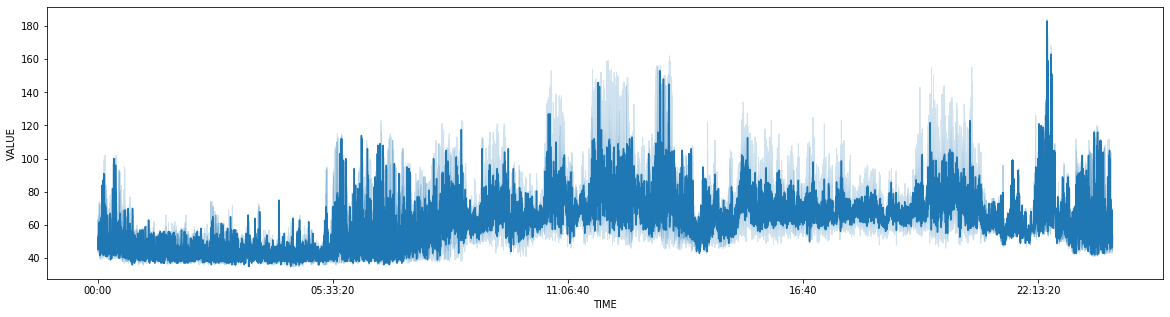

In [1209]:
#The average (with SD) heart rate for the subjects 1004 for ten days.
plt.figure(figsize=(20,5))
sbn.lineplot(x='TIME' , y= 'VALUE', data =small_df)

### Lets transforms all the dataset with proper datatypes as above

In [1210]:
DF['VALUE'] = DF['VALUE'].astype(int)
DF['TIME'] = [datetime.time(i.hour,i.minute,i.second) for i in DF['TIME'].to_numpy()]

AttributeError: 'str' object has no attribute 'hour'

In [1211]:
times = []
for n,i in enumerate(DF['TIME']):
    try:
        times.append(datetime.time(i.hour,i.minute,i.second))
    except:
        datos = i.split(':')
        times.append(datetime.time(int(datos[0]),int(datos[1]),int(datos[2])))

In [1212]:
DF['TIME'] = times

In [1213]:
#SANITY CHECK
{type(i) for i in DF['TIME']} 

{datetime.time}

In [1214]:
DF.query('ID == "1002" and DATE == "0717"').groupby('TIME').agg('count').sort_values(by = ['VALUE','TIME'] , ascending = [False,True])

,VALUE,ID,DATE
TIME,,,
00:00:00,1,1,1
00:00:05,1,1,1
00:00:10,1,1,1
00:00:15,1,1,1
00:00:25,1,1,1
...,...,...,...
23:58:25,1,1,1
23:58:30,1,1,1
23:58:35,1,1,1


In [1215]:
with open('./Clean Data R00/HR_DF_TIMECORRECTED.pickle', 'wb') as handle:
    pickle.dump(DF, handle)

In [1061]:
with open('./Clean Data R00/HR_DF_TIMECORRECTED.pickle', 'rb') as handle:
    DF = pickle.load(handle)

------------


---

# Steps

In [1049]:
#One more time I inititiate a DF with the first file
del(df)
del(df2)
del(DF)

In [709]:
#Something is wrong with this file
files[26]
#We are going to ommit this file on the loading process

'R00_1066_Activity_Tracking.xlsx'

In [713]:
#initialize my df
df = parser(path + files[0], 'steps' ) 

1002
['API_1002_steps_0716_min', 'API_1002_steps_0717_min', 'API_1002_steps_0718_min', 'API_1002_steps_0719_min', 'API_1002_steps_0720_min', 'API_1002_steps_0721_min', 'API_1002_steps_0722_min', 'API_1002_steps_0723_min', 'API_1002_steps_0724_min', 'API_1002_steps_0725_min']


In [714]:
df.head()

,TIME,VALUE,ID,DATE
0,00:00:00,8,1002,0716
1,00:01:00,3,1002,0716
2,00:02:00,0,1002,0716
3,00:03:00,0,1002,0716
4,00:04:00,0,1002,0716


In [715]:
for file in files[1:]:
    if file == files[26]: continue
    df2 = parser(path + file, 'steps')
    df = pd.concat([df,df2], axis = 0, join = 'outer', sort = False).copy()
    print(df.columns)
    print('------------------------------------------------------------------------------------------------')

1004
['API_1004_steps_0630_min', 'API_1004_steps_0701_min', 'API_1004_steps_0702_min', 'API_1004_steps_0703_min', 'API_1004_steps_0704_min', 'API_1004_steps_0705_min', 'API_1004_steps_0706_min', 'API_1004_steps_0707_min', 'API_1004_steps_0708_min', 'API_1004_steps_0709_min']
Index(['TIME', 'VALUE', 'ID', 'DATE'], dtype='object')
------------------------------------------------------------------------------------------------
1008
['API_1008_steps_0725_min', 'API_1008_steps_0726_min', 'API_1008_steps_0727_min', 'API_1008_steps_0728_min', 'API_1008_steps_0729_min', 'API_1008_steps_0730_min', 'API_1008_steps_0731_min', 'API_1008_steps_0801_min', 'API_1008_steps_0802_min', 'API_1008_steps_0803_min']
Index(['TIME', 'VALUE', 'ID', 'DATE'], dtype='object')
------------------------------------------------------------------------------------------------
1009
['API_1009_steps_1002_min', 'API_1009_steps_1003_min', 'API_1009_steps_1004_min', 'API_1009_steps_1005_min', 'API_1009_steps_1006_min', 'AP

In [716]:
df.head()

,TIME,VALUE,ID,DATE,N/A
0,00:00:00,8.0,1002,0716,NaN
1,00:01:00,3.0,1002,0716,NaN
2,00:02:00,0.0,1002,0716,NaN
3,00:03:00,0.0,1002,0716,NaN
4,00:04:00,0.0,1002,0716,NaN


In [717]:
DF = df.drop(columns = 'N/A')

In [718]:
with open('./Pickle objects NOT CLEANED/Steeps_df.pickle', 'wb') as handle:
    pickle.dump(DF, handle)

In [720]:
df2 = parser(path + files[26], 'steps')

1066
['API_1081_steps_1004_min', 'API_1081_steps_1005_min', 'API_1081_steps_1006_min', 'API_1081_steps_1007_min', 'API_1081_steps_1008_min', 'API_1081_steps_1009_min', 'API_1081_steps_1010_min', 'API_1081_steps_1011_min', 'API_1081_steps_1012_min', 'API_1081_steps_1013_min']


In [722]:
df2 = df2.iloc[:,:4].copy()

In [724]:
df2.head()

,TIME,VALUE,ID,DATE
0,00:00:00,0,1066,1004
1,00:01:00,0,1066,1004
2,00:02:00,0,1066,1004
3,00:03:00,0,1066,1004
4,00:04:00,0,1066,1004


In [725]:
DF = pd.concat([DF,df2], axis = 0, join = 'outer', sort = False).copy()
DF.head()

,TIME,VALUE,ID,DATE
0,00:00:00,8.0,1002,0716
1,00:01:00,3.0,1002,0716
2,00:02:00,0.0,1002,0716
3,00:03:00,0.0,1002,0716
4,00:04:00,0.0,1002,0716


In [816]:
with open('./Clean Data R00/STEPS_DF.pickle', 'wb') as handle:
    pickle.dump(DF, handle)

In [1216]:
with open('./Clean Data R00/STEPS_DF.pickle', 'rb') as handle:
    DF = pickle.load(handle)

Text(0.5, 1.0, 'ID 1004 - Daily #Steps')

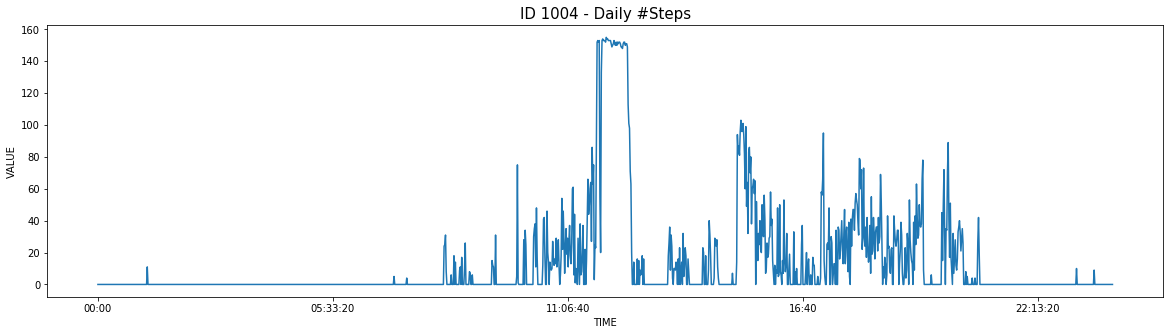

In [1218]:
plt.figure(figsize=(20,5))
sbn.lineplot( x = DF.loc[(DF['ID'] == '1004') & (DF['DATE'] == '0630'),:]['TIME'],
              y = DF.loc[(DF['ID'] == '1004') & (DF['DATE'] == '0630'),:]['VALUE'])
plt.title('ID 1004 - Daily #Steps', size = 15)

In [1219]:
rolled = DF.loc[(DF['ID'] == '1004') & (DF['DATE'] == '0630'),:]['VALUE'].rolling(10, center = True).mean()

Text(0.5, 1.0, 'ID 1004 - Daily #Steps)')

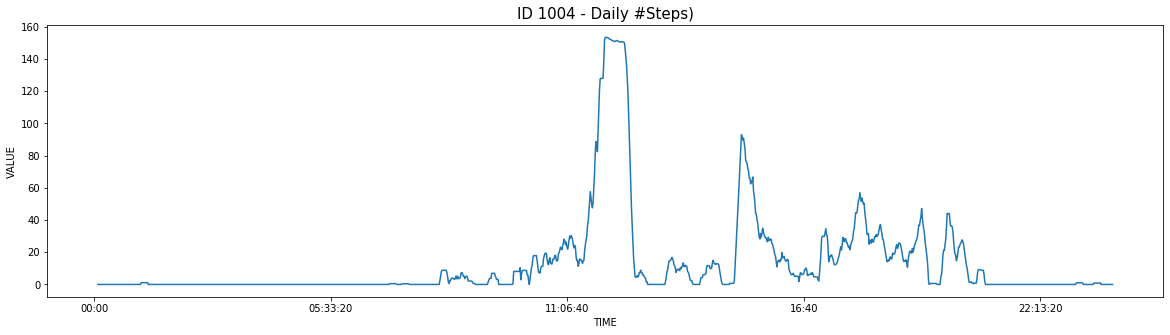

In [1220]:
plt.figure(figsize=(20,5))
sbn.lineplot( x = DF.loc[(DF['ID'] == '1004') & (DF['DATE'] == '0630'),:]['TIME'],
              y = rolled)
plt.title('ID 1004 - Daily #Steps)', size = 15)

---

# Integration Heart - Steps

In [6]:
with open('./Clean Data R00/HR_DF_TIMECORRECTED.pickle', 'rb') as handle:
    heart = pickle.load(handle)
heart.reset_index(inplace = True , drop = True)
heart.head()

,TIME,VALUE,ID,DATE
0,00:00:00,73,1002,0716
1,00:00:15,72,1002,0716
2,00:00:20,70,1002,0716
3,00:00:35,70,1002,0716
4,00:00:40,65,1002,0716


In [3]:
len(heart.loc[(heart['ID'] == '1004') & (heart['DATE'] == '0630'),'TIME'].unique())

8333

In [4]:
with open('./Clean Data R00/STEPS_DF.pickle', 'rb') as handle:
    steeps = pickle.load(handle)
steeps.reset_index(inplace = True , drop = True)
steeps.head()

,TIME,VALUE,ID,DATE
0,00:00:00,8.0,1002,0716
1,00:01:00,3.0,1002,0716
2,00:02:00,0.0,1002,0716
3,00:03:00,0.0,1002,0716
4,00:04:00,0.0,1002,0716


In [5]:
len(steeps.loc[(steeps['ID'] == '1004') & (steeps['DATE'] == '0630'),'TIME'].unique())

1440

In [7]:
rolled_heart = heart.loc[(heart['ID'] == '1002') & (heart['DATE'] == '0716'),:]['VALUE'].rolling(25).mean()
rolled_step  = steeps.loc[(steeps['ID'] == '1002') & (steeps['DATE'] == '0716'),:]['VALUE'].rolling(10).mean()

Text(0.5, 1.0, 'ID 1002 - Date 7/16 - HR & Steps')

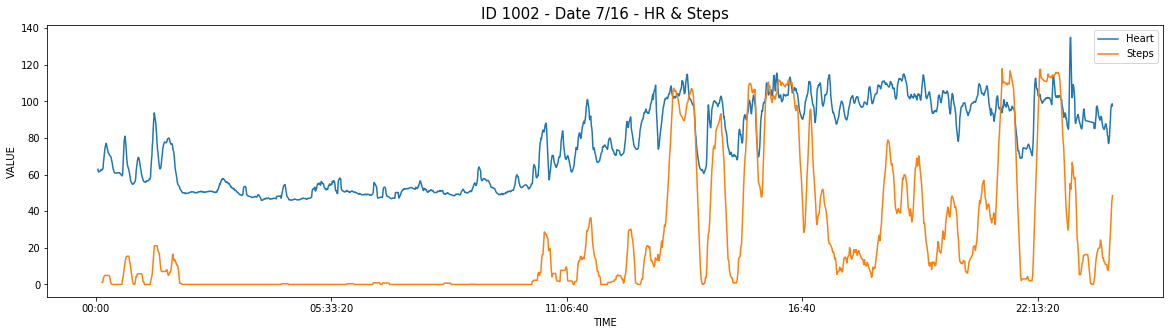

In [8]:
plt.figure(figsize=(20,5))
sbn.lineplot( x = heart.loc[(heart['ID'] == '1002') & (heart['DATE'] == '0716'),:]['TIME'],
              y = rolled_heart, label='Heart', estimator= None)
sbn.lineplot( x = steeps.loc[(steeps['ID'] == '1002') & (steeps['DATE'] == '0716'),:]['TIME'],
              y = rolled_step , label='Steps', estimator= None)
plt.title('ID 1002 - Date 7/16 - HR & Steps', size = 15)


---
---
---

# A WEIRD CORRELATION ANALYSIS

In [1236]:
dummy_df = steeps.loc[(steeps['ID'] == '1004') & (steeps['DATE'] == '0630'),['VALUE','TIME']].copy()
merged = pd.merge(dummy_df, heart.loc[(heart['ID'] == '1004') & (heart['DATE'] == '0630'),:], how= 'left', on = 'TIME',suffixes=['_steps','_HR'])

In [1237]:
merged.shape

(1440, 5)

In [1254]:
merged['CORRELATION'] = merged.loc[:, 'VALUE_HR'].rolling(5,4).corr(merged.loc[:,'VALUE_steps'])
merged.head(15)

,VALUE_steps,TIME,VALUE_HR,ID,DATE,CORRELATION
0,0.0,00:00:00,NaN,NaN,NaN,NaN
1,0.0,00:01:00,NaN,NaN,NaN,NaN
2,0.0,00:02:00,NaN,NaN,NaN,NaN
3,0.0,00:03:00,42.0,1004,0630,NaN
4,0.0,00:04:00,NaN,NaN,NaN,NaN
5,0.0,00:05:00,NaN,NaN,NaN,NaN
6,0.0,00:06:00,NaN,NaN,NaN,NaN
7,0.0,00:07:00,44.0,1004,0630,NaN
8,0.0,00:08:00,NaN,NaN,NaN,NaN
9,0.0,00:09:00,43.0,1004,0630,NaN


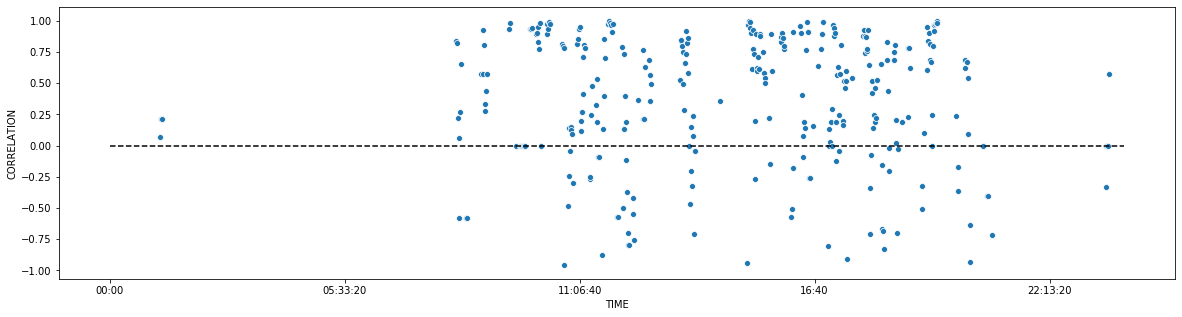

In [1255]:
plt.figure(figsize=(20,5))
sbn.scatterplot(y = 'CORRELATION', x= 'TIME' , data = merged , estimator=None)
plt.hlines(0,'00:00','23:59',linestyles= '--')

In [1257]:
#Standarized
V_MEAN = merged.VALUE_HR.mean()
V_STD = merged.VALUE_HR.std()
S_MEAN = merged.VALUE_steps.mean()
S_STD = merged.VALUE_steps.std()

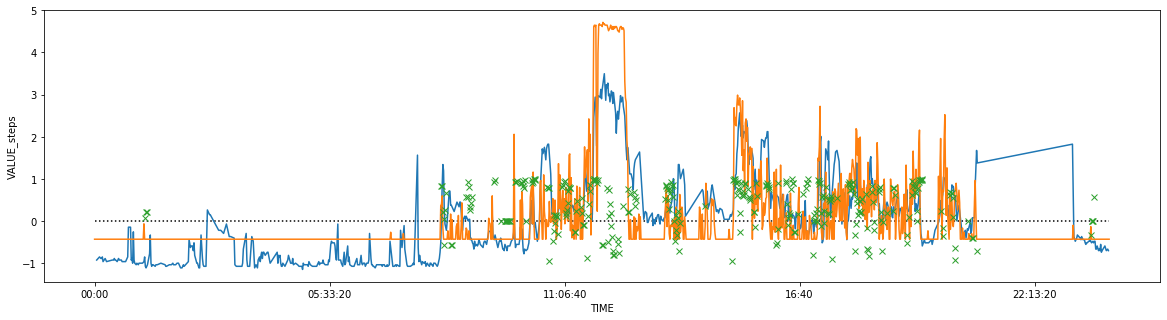

In [1258]:
plt.figure(figsize=(20,5))
sbn.lineplot(merged['TIME'],(merged['VALUE_HR'] - V_MEAN) / V_STD, estimator = None)
sbn.lineplot(merged['TIME'],(merged['VALUE_steps'] - S_MEAN) / S_STD, estimator = None )
plt.plot(merged['TIME'],merged['CORRELATION'], 'x')
plt.hlines(0,'00:00','23:59',linestyles= 'dotted')

In [1259]:
dates = heart.loc[heart['ID'] == '1004',:]['DATE'].unique()
dates

array(['0630', '0701', '0702', '0703', '0704', '0705', '0706', '0707',
       '0708', '0709'], dtype=object)

Text(0.5, 0.98, 'ID 1004 - Daily heart-rate values(HR)')

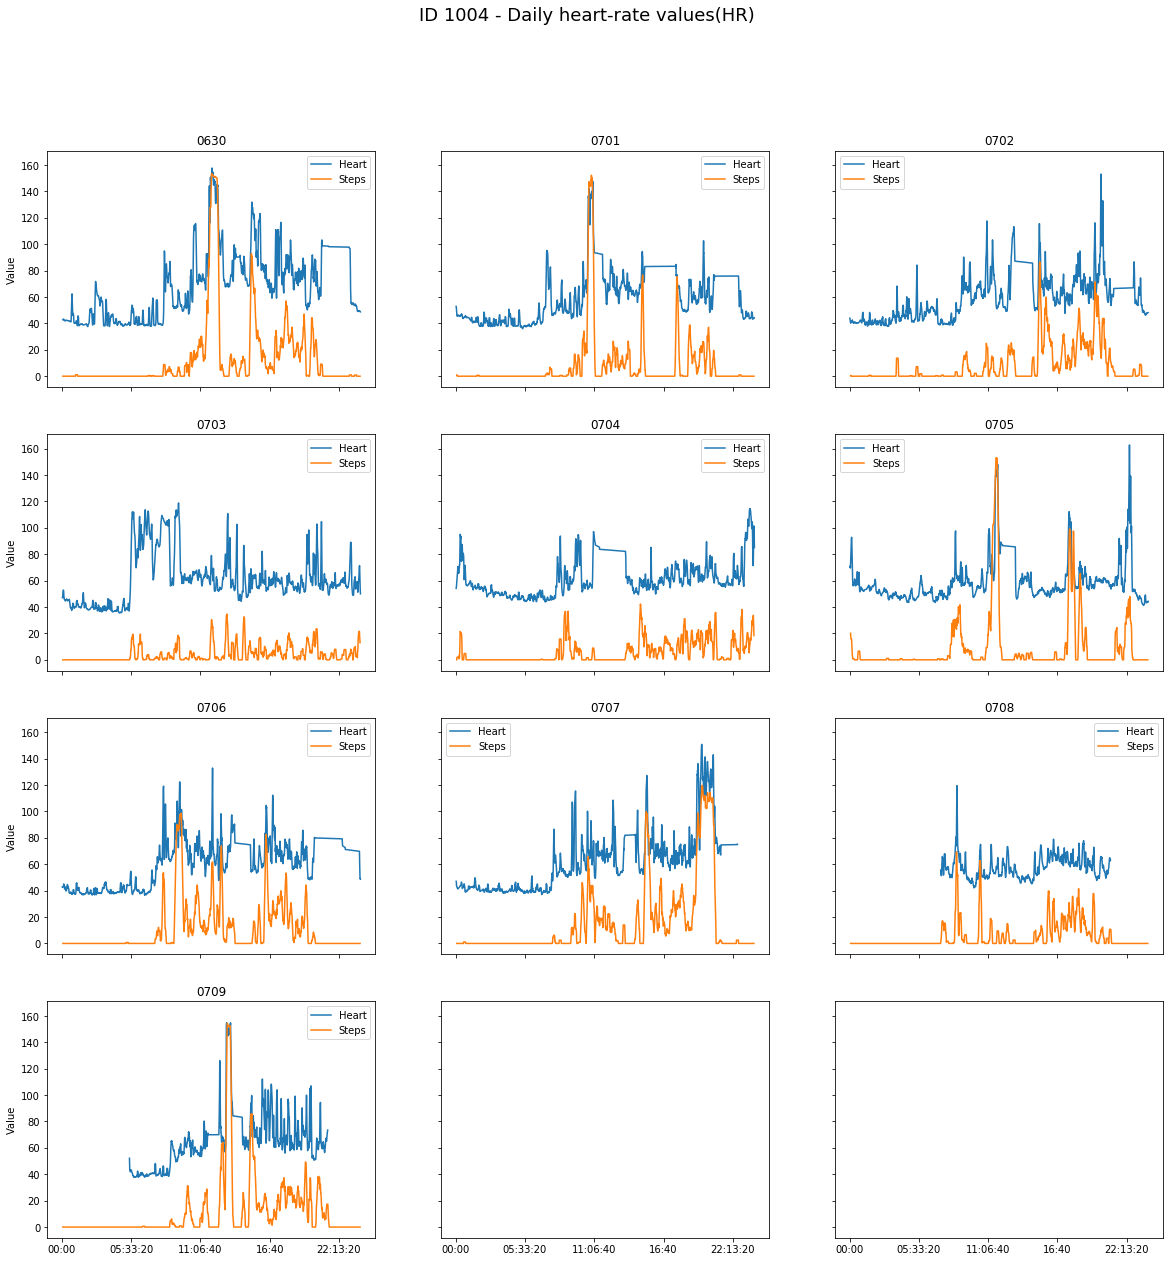

In [1264]:
fig, ax = plt.subplots(4, 3, sharex= True, sharey=True)
fig.set_size_inches(20,20)
ax = ax.reshape(1,-1)[0].copy()

for n, date in enumerate(dates):
    rolled_heart = heart.loc[(heart['ID'] == '1004') & (heart['DATE'] == date),:]['VALUE'].rolling(25, center = True).mean()
    rolled_step  = steeps.loc[(steeps['ID'] == '1004') & (steeps['DATE'] == date),:]['VALUE'].rolling(10, center = True).mean()
    
    sbn.lineplot( x = heart.loc[(heart['ID'] == '1004') & (heart['DATE'] == date),:]['TIME'],
                  y = rolled_heart, label='Heart',ax = ax[n])
    
    graph = sbn.lineplot( x = steeps.loc[(steeps['ID'] == '1004') & (steeps['DATE'] == date),:]['TIME'],
                          y = rolled_step , label='Steps',ax = ax[n])
    graph.set(xlabel='')
    

for n,x in enumerate(ax):
    if n > 9: break
    x.set_ylabel('Value')  
    x.set_title(dates[n])
plt.suptitle('ID 1004 - Daily heart-rate values(HR)', size = 18)

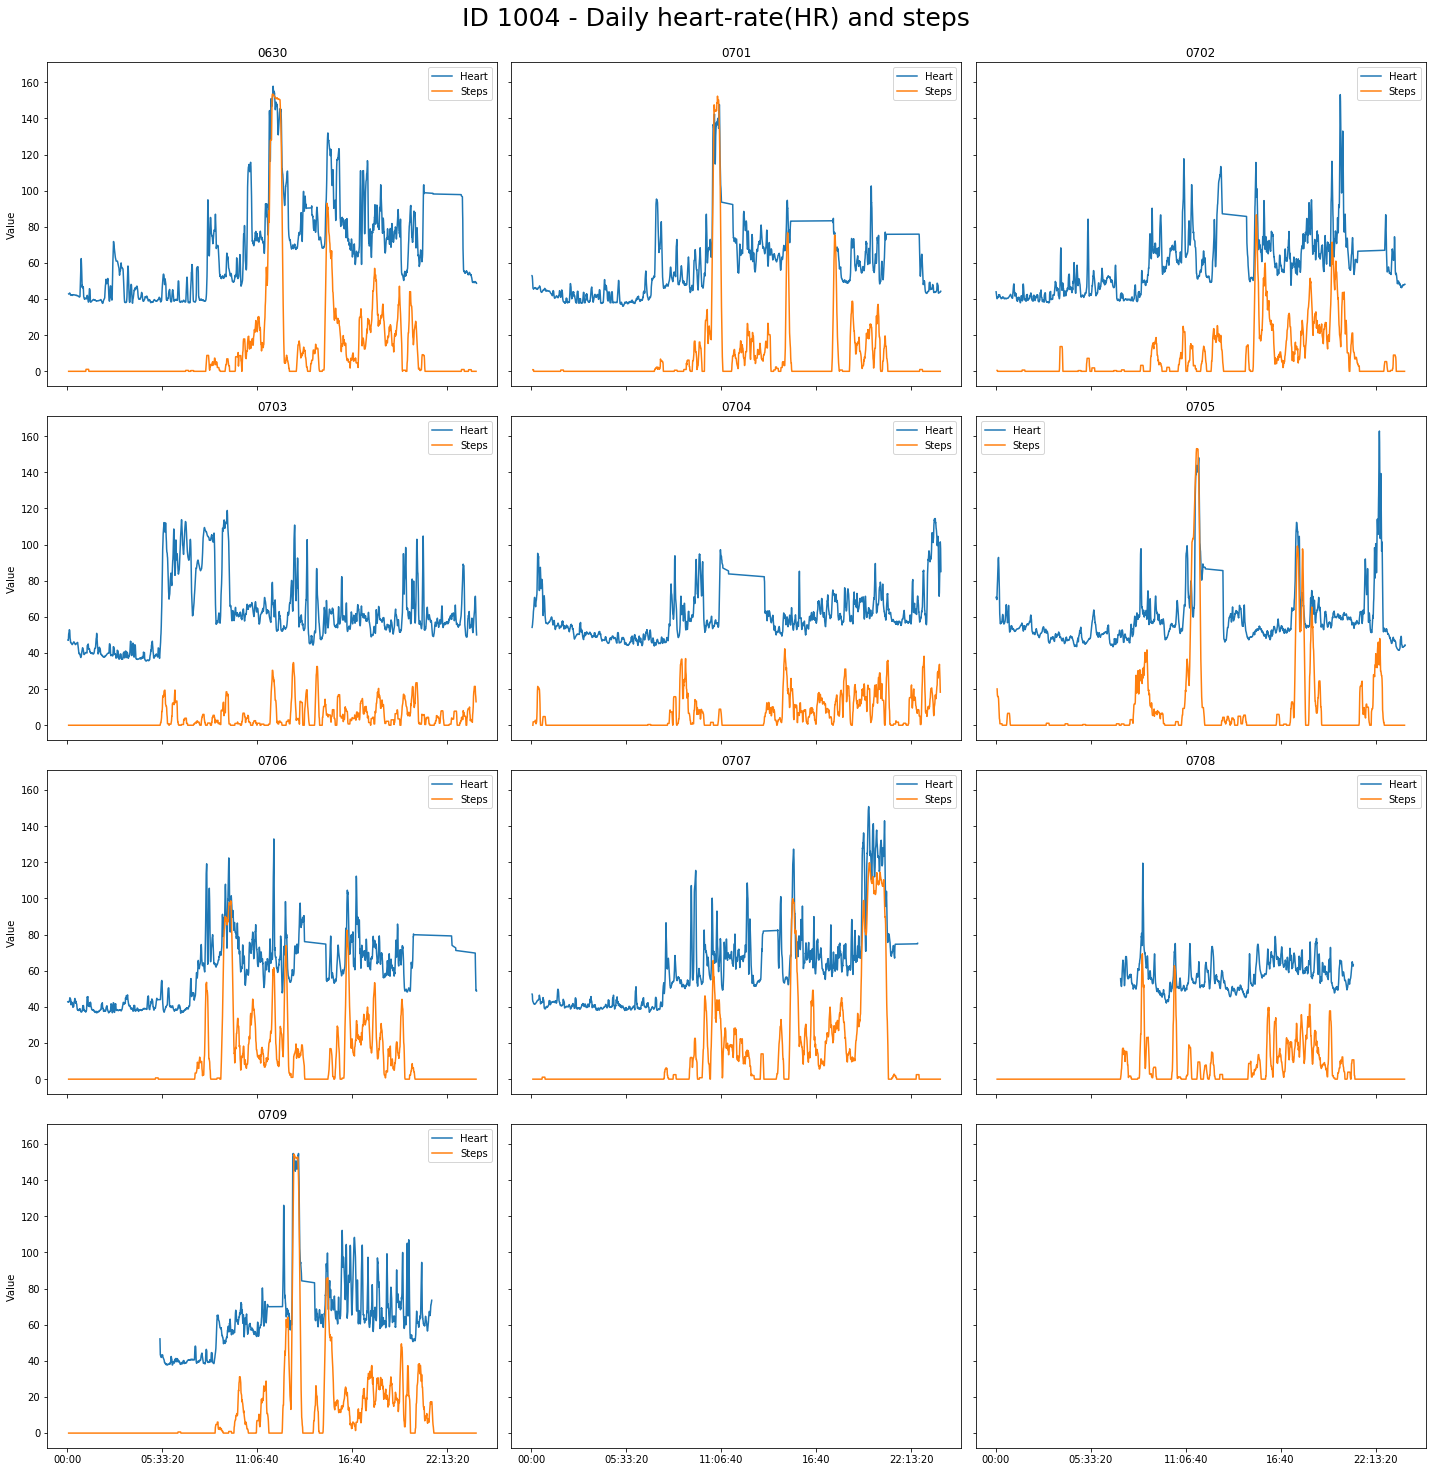

In [1265]:
fig.suptitle('ID 1004 - Daily heart-rate(HR) and steps', size = 25, y = 1.02)
fig.set_size_inches(20,20)
fig.set_tight_layout('rect')
fig

## Adding datetime columns to the Dataframes
### Steps

In [4]:
with open ('./Clean Data R00/STEPS_DF.pickle', 'rb') as steps:
    steps_df = pickle.load(steps)
with open ('./Clean Data R00/ACTIVITY_R00.pickle', 'rb') as activity :
    activity_df = pickle.load(activity)

In [3]:
steps_df.head()

,TIME,VALUE,ID,DATE
0,00:00:00,8.0,1002,0716
1,00:01:00,3.0,1002,0716
2,00:02:00,0.0,1002,0716
3,00:03:00,0.0,1002,0716
4,00:04:00,0.0,1002,0716


In [6]:
activity_df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,DATE,ID,Experiment
0,2015-07-16,"4,200","35,439",15.56,53,280,327,166,162,"3,305",0716,1002,R00
1,2015-07-17,"3,789","28,843",12.67,48,347,273,168,127,"2,794",0717,1002,R00
2,2015-07-18,"4,478","39,139",17.24,102,340,400,124,194,"3,629",0718,1002,R00
3,2015-07-19,"4,715","45,343",19.94,116,327,391,121,248,"3,920",0719,1002,R00
4,2015-07-20,"3,948","31,182",13.72,61,407,335,114,157,"3,001",0720,1002,R00


In [10]:
act_filt = activity_df.filter(items=['Date', 'ID','DATE'])
act_filt.head()

,Date,ID,DATE
0,2015-07-16,1002,0716
1,2015-07-17,1002,0717
2,2015-07-18,1002,0718
3,2015-07-19,1002,0719
4,2015-07-20,1002,0720


In [15]:
steps_date = pd.merge(steps_df,act_filt,how='left',on =['ID','DATE'])
steps_date.head()

,TIME,VALUE,ID,DATE,Date
0,00:00:00,8.0,1002,0716,2015-07-16
1,00:01:00,3.0,1002,0716,2015-07-16
2,00:02:00,0.0,1002,0716,2015-07-16
3,00:03:00,0.0,1002,0716,2015-07-16
4,00:04:00,0.0,1002,0716,2015-07-16


In [20]:
with open ('./Clean Data R00/STEPS_TIMESERIES_R00.pickle', 'wb') as handle:
    pickle.dump(steps_date,handle)

### SLEEP

In [ ]:
with open ('./Clean Data R00/STEPS_DF.pickle', 'rb') as steps:
    steps_df = pickle.load(steps)
with open ('./Clean Data R00/ACTIVITY_R00.pickle', 'rb') as activity :
    activity_df = pickle.load(activity)